<a href="https://colab.research.google.com/github/UJWAL-SHAH/ML/blob/master/Lab%20Work/ML_Lab6_J078.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Lab 6 (Simple Neural Network)**

##**Roll no : J078**

In [105]:
import pandas as pd

##Bitcoin 2011 Dataset

In [106]:
!wget -O 2011gcn.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/2011gcn.csv
!wget -O tx2011partvertices_new.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices_new.csv
!wget -O tx2011partvertices.csv https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices.csv
 
train1 = pd.read_csv('2011gcn.csv')
train2 = pd.read_csv('tx2011partvertices_new.csv')
train3 = pd.read_csv('tx2011partvertices.csv')

--2020-09-04 08:05:20--  https://raw.githubusercontent.com/pranavn91/blockchain/master/2011gcn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12563086 (12M) [text/plain]
Saving to: ‘2011gcn.csv’

2011gcn.csv         100%[===================>]  11.98M  42.4MB/s    in 0.3s    

2020-09-04 08:05:20 (42.4 MB/s) - ‘2011gcn.csv’ saved [12563086/12563086]

--2020-09-04 08:05:21--  https://raw.githubusercontent.com/pranavn91/blockchain/master/tx2011partvertices_new.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12501458 (12M) [text/plain]

##Checking Dataset Shape & Structure

In [107]:
print('Train 1 Shape: ', train1.shape)
print('Train 2 Shape: ', train2.shape)
print('Train 3 Shape: ', train3.shape)

Train 1 Shape:  (96498, 17)
Train 2 Shape:  (96498, 20)
Train 3 Shape:  (96498, 2)


In [108]:
train1.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0.0,4.811244e+07,0.0,0.0,5.298934e+07,0.0,5.215435e+07,0.0,0.0,4.293262e+05,3.994267e+07,6.251989e+07,0.0,0.0,2.670458e+07,8.313858e+07
1,1,0.0,3.477977e+05,0.0,0.0,3.777575e+05,0.0,3.757520e+05,0.0,0.0,6.889133e+03,3.001618e+05,4.527358e+05,0.0,0.0,1.915057e+05,6.009039e+05
2,2,0.0,6.455196e+07,0.0,0.0,7.110790e+07,0.0,6.997804e+07,0.0,0.0,5.670157e+05,5.356332e+07,8.388026e+07,0.0,0.0,3.583296e+07,1.115463e+08
3,3,0.0,2.009876e+08,0.0,0.0,2.214679e+08,0.0,2.174101e+08,0.0,0.0,1.342720e+06,1.665389e+08,2.614420e+08,0.0,0.0,1.116514e+08,3.472892e+08
4,4,0.0,2.384675e+05,0.0,0.0,2.597246e+05,0.0,2.577884e+05,0.0,0.0,4.202993e+03,2.042845e+05,3.103489e+05,0.0,0.0,1.315073e+05,4.120424e+05


In [109]:
train2.head()

,Unnamed: 0,txsize,txvirtualsize,txinputs_count,txoutputs_count,txinput_val,txoutput_val,txfee,Min_received,Max_received,Avg_received,Total_received,Stdev_received,Var_received,Min_sent,Max_sent,Avg_sent,Total_sent,Stdev_sent,Var_sent
0,1,7369,7369,5,190,215000000.0,214600000.0,400000,0.0005,1.0000,0.011295,2.1460,0.081163,0.006587,0.0005,1.6700,0.4300,2.1500,0.703445,0.494835
1,2,293,293,1,3,4400000.0,4350000.0,50000,0.0010,0.0415,0.014500,0.0435,0.023383,0.000547,0.0440,0.0440,0.0440,0.0440,0.000000,0.000000
2,3,11139,11139,1,322,125000000.0,124400000.0,600000,0.0010,0.4460,0.003863,1.2440,0.024941,0.000622,1.2500,1.2500,1.2500,1.2500,0.000000,0.000000
3,4,495,495,1,9,27450000.0,27400000.0,50000,0.0010,0.2660,0.030444,0.2740,0.088333,0.007803,0.2745,0.2745,0.2745,0.2745,0.000000,0.000000
4,5,462,462,1,8,3000000.0,2950000.0,50000,0.0010,0.0225,0.003687,0.0295,0.007601,0.000058,0.0300,0.0300,0.0300,0.0300,0.000000,0.000000


In [110]:
train3.head()

,Unnamed: 0,label
0,1,unclassified
1,2,donations
2,3,unclassified
3,4,donations
4,5,donations


##Pre-Processing the Dataset

In [111]:
train1.rename(columns={'Unnamed: 0':'index'}, inplace=True)
train1['index'] = train1['index'] + 1
train1.head()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0.0,4.811244e+07,0.0,0.0,5.298934e+07,0.0,5.215435e+07,0.0,0.0,4.293262e+05,3.994267e+07,6.251989e+07,0.0,0.0,2.670458e+07,8.313858e+07
1,2,0.0,3.477977e+05,0.0,0.0,3.777575e+05,0.0,3.757520e+05,0.0,0.0,6.889133e+03,3.001618e+05,4.527358e+05,0.0,0.0,1.915057e+05,6.009039e+05
2,3,0.0,6.455196e+07,0.0,0.0,7.110790e+07,0.0,6.997804e+07,0.0,0.0,5.670157e+05,5.356332e+07,8.388026e+07,0.0,0.0,3.583296e+07,1.115463e+08
3,4,0.0,2.009876e+08,0.0,0.0,2.214679e+08,0.0,2.174101e+08,0.0,0.0,1.342720e+06,1.665389e+08,2.614420e+08,0.0,0.0,1.116514e+08,3.472892e+08
4,5,0.0,2.384675e+05,0.0,0.0,2.597246e+05,0.0,2.577884e+05,0.0,0.0,4.202993e+03,2.042845e+05,3.103489e+05,0.0,0.0,1.315073e+05,4.120424e+05


In [112]:
train2.rename(columns={'Unnamed: 0':'index'}, inplace=True)
train2.head()

,index,txsize,txvirtualsize,txinputs_count,txoutputs_count,txinput_val,txoutput_val,txfee,Min_received,Max_received,Avg_received,Total_received,Stdev_received,Var_received,Min_sent,Max_sent,Avg_sent,Total_sent,Stdev_sent,Var_sent
0,1,7369,7369,5,190,215000000.0,214600000.0,400000,0.0005,1.0000,0.011295,2.1460,0.081163,0.006587,0.0005,1.6700,0.4300,2.1500,0.703445,0.494835
1,2,293,293,1,3,4400000.0,4350000.0,50000,0.0010,0.0415,0.014500,0.0435,0.023383,0.000547,0.0440,0.0440,0.0440,0.0440,0.000000,0.000000
2,3,11139,11139,1,322,125000000.0,124400000.0,600000,0.0010,0.4460,0.003863,1.2440,0.024941,0.000622,1.2500,1.2500,1.2500,1.2500,0.000000,0.000000
3,4,495,495,1,9,27450000.0,27400000.0,50000,0.0010,0.2660,0.030444,0.2740,0.088333,0.007803,0.2745,0.2745,0.2745,0.2745,0.000000,0.000000
4,5,462,462,1,8,3000000.0,2950000.0,50000,0.0010,0.0225,0.003687,0.0295,0.007601,0.000058,0.0300,0.0300,0.0300,0.0300,0.000000,0.000000


In [113]:
train3.rename(columns={'Unnamed: 0':'index'}, inplace=True)
train3.head()

,index,label
0,1,unclassified
1,2,donations
2,3,unclassified
3,4,donations
4,5,donations


##Preparation of the dataset

In [114]:
results = pd.merge(train3, train1, on='index', how='inner')#On =on which column to merge them and how ="Inner,left,right"
# split data into X and y
X = results.iloc[:,2:18]  #results.shape
Y1 = results['label']

In [115]:
results

,index,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,unclassified,0.0,4.811244e+07,0.0,0.0,5.298934e+07,0.0,5.215435e+07,0.0,0.0,4.293262e+05,3.994267e+07,6.251989e+07,0.0,0.0,2.670458e+07,8.313858e+07
1,2,donations,0.0,3.477977e+05,0.0,0.0,3.777575e+05,0.0,3.757520e+05,0.0,0.0,6.889133e+03,3.001618e+05,4.527358e+05,0.0,0.0,1.915057e+05,6.009039e+05
2,3,unclassified,0.0,6.455196e+07,0.0,0.0,7.110790e+07,0.0,6.997804e+07,0.0,0.0,5.670157e+05,5.356332e+07,8.388026e+07,0.0,0.0,3.583296e+07,1.115463e+08
3,4,donations,0.0,2.009876e+08,0.0,0.0,2.214679e+08,0.0,2.174101e+08,0.0,0.0,1.342720e+06,1.665389e+08,2.614420e+08,0.0,0.0,1.116514e+08,3.472892e+08
4,5,donations,0.0,2.384675e+05,0.0,0.0,2.597246e+05,0.0,2.577884e+05,0.0,0.0,4.202993e+03,2.042845e+05,3.103489e+05,0.0,0.0,1.315073e+05,4.120424e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96493,96494,donations,0.0,1.076483e+09,0.0,0.0,1.186269e+09,0.0,1.167082e+09,0.0,0.0,9.130316e+06,8.922416e+08,1.398730e+09,0.0,0.0,5.976924e+08,1.860175e+09
96494,96495,donations,0.0,3.046724e+09,0.0,0.0,3.357382e+09,0.0,3.303128e+09,0.0,0.0,2.588797e+07,2.525414e+09,3.958776e+09,0.0,0.0,1.691605e+09,5.264773e+09
96495,96496,donations,0.0,7.927045e+08,0.0,0.0,8.734944e+08,0.0,8.594076e+08,0.0,0.0,6.762438e+06,6.571497e+08,1.030010e+09,0.0,0.0,4.401156e+08,1.369801e+09
96496,96497,exchange,0.0,1.702268e+09,0.0,0.0,1.875876e+09,0.0,1.845536e+09,0.0,0.0,1.443773e+07,1.410918e+09,2.211843e+09,0.0,0.0,9.451462e+08,2.941539e+09


In [116]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(results['label'].unique())
Y = le.transform(Y1)

In [117]:
results['label'].unique()

array(['unclassified', 'donations', 'exchange', 'mixer', 'paymentgateway',
       'wallets'], dtype=object)

##Standardise the Data

In [118]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_stand=scaler.fit_transform(X)

##Split data into train and test sets

In [119]:
from sklearn.model_selection import train_test_split
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_stand, Y, test_size=test_size, random_state=seed)

In [120]:
#Can use this also but we already did in X_stand or else we cando it here after dividing in training & testing
#scaler=StandardScaler()
#X_train=scaler.fit_transform(X_train) #Remember the transformation done  for normalisation in training  
#X_test=scaler.transform(X_test)  #Fit the same transformation of normalisation in Testing

In [121]:
X_train

array([[-0.02480628, -0.04059748,  0.        , ...,  0.        ,
        -0.03714467, -0.04072057],
       [-0.02480628, -0.03446475,  0.        , ...,  0.        ,
        -0.031027  , -0.03458512],
       [-0.02480628, -0.03029807,  0.        , ...,  0.        ,
        -0.0268701 , -0.03041658],
       ...,
       [ 0.5887014 , -0.06028343,  0.        , ...,  0.        ,
        -0.05682258, -0.06057504],
       [-0.02480628, -0.03735024,  0.        , ...,  0.        ,
        -0.03390422, -0.03747184],
       [-0.02480628, -0.05028123,  0.        , ...,  0.        ,
        -0.0468013 , -0.05040851]])

In [122]:
#To divide Y-train & y_test in categorical
from keras.utils import to_categorical
y_train = to_categorical(y_train, 6)
y_test = to_categorical(y_test, 6)

In [123]:
y_train

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [124]:
y_test

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [125]:
from keras import models
from keras import layers

In [126]:
model1=models.Sequential()
model1.add(layers.Dense(100,activation="sigmoid",input_shape=(16,)))
model1.add(layers.Dense(6,activation="softmax"))

In [127]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               1700      
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 606       
Total params: 2,306
Trainable params: 2,306
Non-trainable params: 0
_________________________________________________________________


In [129]:
model1.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [130]:
history=model1.fit(X_train, y_train, epochs=25,batch_size=5, verbose=1, validation_split=0.25)

Epoch 1/25
11580/11580 [==============================] - 15s 1ms/step - loss: 0.5811 - accuracy: 0.8514 - val_loss: 0.5583 - val_accuracy: 0.8678
Epoch 2/25
11580/11580 [==============================] - 15s 1ms/step - loss: 0.5425 - accuracy: 0.8707 - val_loss: 0.5530 - val_accuracy: 0.8680
Epoch 3/25
11580/11580 [==============================] - 20s 2ms/step - loss: 0.5390 - accuracy: 0.8710 - val_loss: 0.5486 - val_accuracy: 0.8682
Epoch 4/25
11580/11580 [==============================] - 17s 2ms/step - loss: 0.5369 - accuracy: 0.8709 - val_loss: 0.5629 - val_accuracy: 0.8681
Epoch 5/25
11580/11580 [==============================] - 16s 1ms/step - loss: 0.5360 - accuracy: 0.8711 - val_loss: 0.5561 - val_accuracy: 0.8682
Epoch 6/25
11580/11580 [==============================] - 16s 1ms/step - loss: 0.5352 - accuracy: 0.8712 - val_loss: 0.5432 - val_accuracy: 0.8679
Epoch 7/25
11580/11580 [==============================] - 15s 1ms/step - loss: 0.5333 - accuracy: 0.8713 - val_loss: 0

In [131]:
#6 Evaluate
test_loss,test_acc=model1.evaluate(X_test,y_test)
print(test_loss)
print(test_acc)

604/604 [==============================] - 1s 1ms/step - loss: 0.5299 - accuracy: 0.8686
0.5299469232559204
0.8686010241508484


##**Accuracy coming around ~ 86% in Training,Validation & Testing Dataset (i.e.above 75% Benchmark)**

##Plot of accuracy of Train & Validation

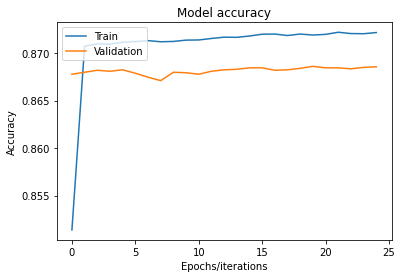

In [135]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()

##Plot of Loss of Train & Validation

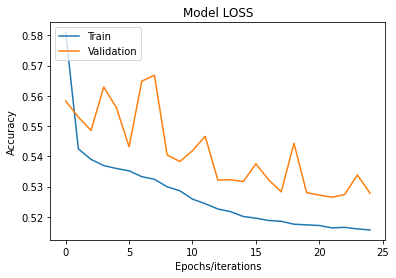

In [134]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model LOSS")
plt.ylabel("Accuracy")
plt.xlabel("Epochs/iterations")
plt.legend(['Train','Validation'], loc="upper left")
plt.show()



---

